
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load        

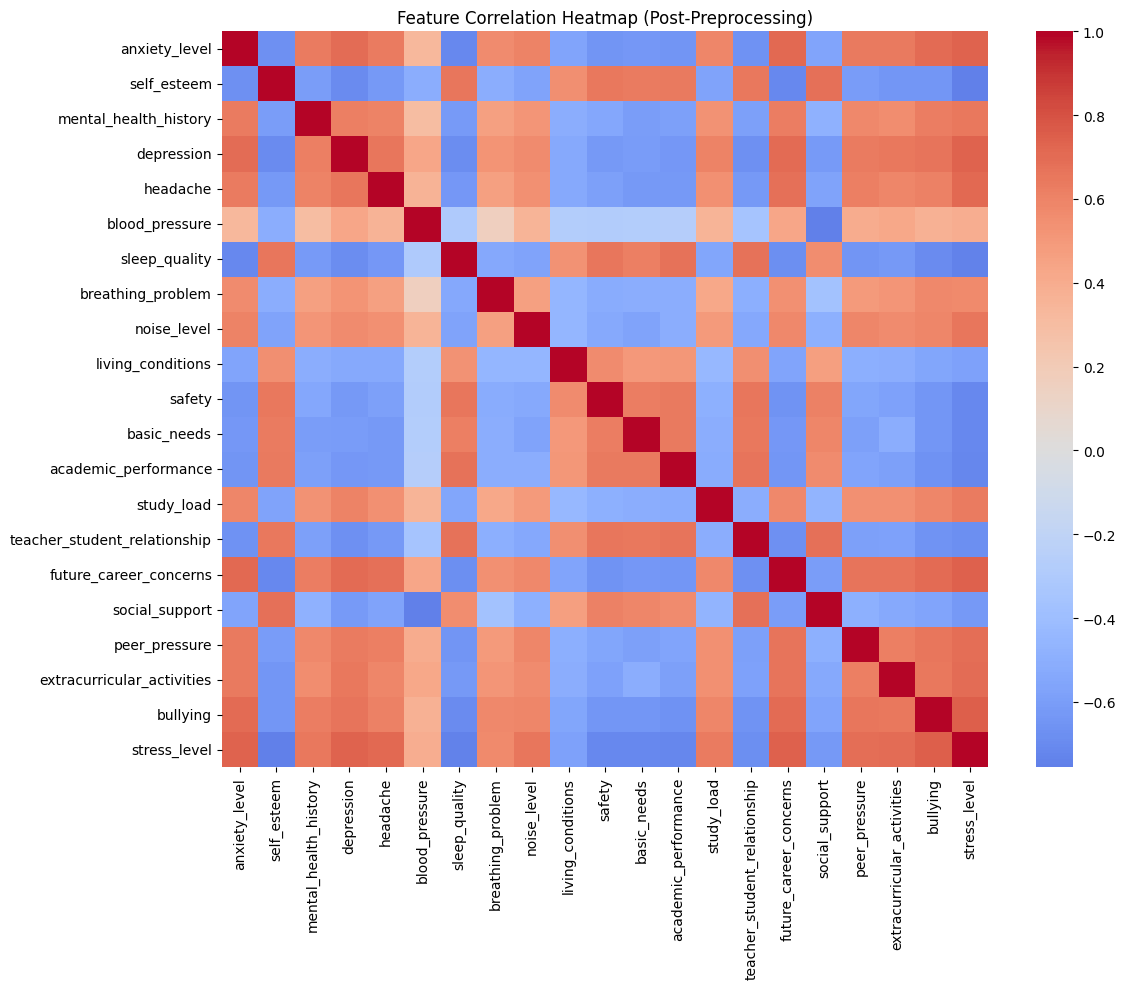


Train samples: 880 (Class dist: [299 286 295])
Test samples: 220 (Class dist: [74 72 74])
Train accuracy :  0.9068181818181819
Test accuracy :  0.8818181818181818
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        74
           1       0.90      0.92      0.91        72
           2       0.88      0.88      0.88        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220

Confusion Matrix:
[[63  5  6]
 [ 3 66  3]
 [ 7  2 65]]
Feature Importance
                         Feature  Coefficient
5                 blood_pressure     1.877122
16                social_support     0.897782
1                    self_esteem     0.296219
12          academic_performance     0.258806
13                    study_load     0.246925
14  teacher_student_relationship     0.242593
11                   basic_needs    

c:\Users\himashinir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score)


# Dataset can be found on
#https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets/data?select=StressLevelDataset.csv
#Download the csv file place it inside the working directory and change the path accordingly
df = pd.read_csv("./StressLevelDataset.csv")

# Print information of the dataset
print("\nDataset Info:")
print(df.info())

# Print sample rows of the dataset
print("\nFirst 5 rows:")
print(df.head())

# Data Preprocessing
print("\nData Preprocessing")
# Fill empty values with median
missing_records = df.isnull().sum()
if(missing_records.sum() > 0):
  numeric_cols = df.select_dtypes(include=[np.number]).columns
  print(numeric_cols)
  medians = df[numeric_cols].median()
  df[numeric_cols] = df[numeric_cols].fillna(medians)
else:
  print("No missing values found.")

#Print Target Distribution (0 = Low/Moderate, 1 = High
print("\nTarget Distribution:")
print(df['stress_level'].value_counts(normalize=True).round(3) * 100)

# Correlation heatmap for insights
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap (Post-Preprocessing)')
plt.tight_layout()
plt.show()

# Define features and target
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Split train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTrain samples: {X_train.shape[0]} (Class dist: {np.bincount(y_train)})")
print(f"Test samples: {X_test.shape[0]} (Class dist: {np.bincount(y_test)})")

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
C_calue = 1.0
# Training model
lr_model = model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    penalty='l2',
    C=C_calue
)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

#Evaluate the model
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print("Train accuracy : ",train_accuracy)
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print("Test accuracy : ",test_accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("Feature Importance")
feature_importance = pd.DataFrame({
    "Feature": df.drop(columns=['stress_level']).columns,
    "Coefficient": np.mean(np.abs(model.coef_), axis=0)
}).sort_values(by="Coefficient", ascending=False)

print(feature_importance)